# Prediction of House Sale Prices with Linear Regression

Quick Links: [Feature Engineering](#Feature-Engineering) | [Feature Selection](#Feature-Selection) | [Cross-Validation and Fitting](#Cross-Validation)

---

<p style='text-align: justify;'>
For this project, we will be working with housing data for the city of Ames, Iowa, United States from 2006 to 2010. According to the abstract of the paper that details why this data was collected, "_the data set contains 2930 observations and a large number of explanatory variables (23 nominal, 23 ordinal, 14 discrete, and 20 continuous) involved in assessing home values._" Furthermore, the researcher, Dean De Cock, highlights how this dataset serves to be an ideal replacement to the <a href="http://lib.stat.cmu.edu/datasets/boston">Boston Housing dataset</a>, another dataset that was popular in the academic community for students and teachers looking for ways to practice regression techniques. For a more detailed description of the dataset and its columns, you can read more <a href="https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627">here</a> and <a href="https://s3.amazonaws.com/dq-content/307/data_description.txt">here</a>.
</p>

<p style='text-align: justify;'>
In the previous course, we started by building intuition for model based learning, explored how the linear regression model worked, understood how the two different approaches to model fitting worked, and some techniques for cleaning, transforming, and selecting features. In this guided project, we will practice what we learned exploring ways to improve the models we built.
</p>

![](https://s3.amazonaws.com/dq-content/240/pipeline.svg)

<p style='text-align: justify;'>
Let's read in the data, and <mark>set up a pipeline of functions</mark> that will let us quickly iterate on different models as the above figure shows.
</p>

In [1]:
# import needed libraries
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

# read in the data
ames = pd.read_csv("AmesHousing.tsv", delimiter="\t")

# create functions
# we will be updating some of these as we go along the modeling process

def transform_features(df):
    return df

def select_features(df):
    return df[["Gr Liv Area", "SalePrice"]]

def train_and_test(df):
    train = df[:1460]
    test  = df[1460:]
    
    # Select numeric columns
    numtrain = train.select_dtypes(include = ["float", "integer"])
    numtest  = test.select_dtypes(include = ["float", "integer"])

    features = numtrain.columns.drop("SalePrice") # drop dependent variable
    
    # train a model using the train set
    lm = LinearRegression().fit(train[features], train["SalePrice"])
    
    # make predictions by testing on the test set
    pred = lm.predict(test[features])
    
    # get RMSE
    rmse = np.sqrt(mean_squared_error(test["SalePrice"], pred))
    
    return rmse
    
# first few rows of the dataset
ames[:5]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


<p style='text-align: justify;'>
Let's now apply our functions to the <code>ames</code> dataset! Note that for now the model will use only the one feature, <code>Gr Liv Area</code> to train and test for prediction accuracy.
</p>

In [2]:
df = transform_features(ames)
df = select_features(df)

df_rmse = train_and_test(df)

print("Initial RMSE:", df_rmse) # Display RMSE

Initial RMSE: 57088.25161263909


Let's hope we see this improve as we dive deeper!

### Feature Engineering

<p style='text-align: justify;'>
Behind every successful and well-oiled model is dedicated and thorough transformations of the features to improve the quality of our predictive performance. Let's start by updating the <code>transform_features()</code> function to <mark>drop any column that has more than 5% missing values</mark>. In general, the goal of this function is to:
</p>
- <input type="checkbox" disabled> Remove features that we don't want to use in the model, just based on the number of missing values or data leakage
- <input type="checkbox" disabled> Transform features into the proper format (numerical to categorical, scaling numerical, filling in missing values, etc.)
- <input type="checkbox" disabled> Create new features by combining other features

For now, the action steps we will take are:
- Drop columns that have more than 5% missing values
- Drop text columns with at least 1 missing row
- For numeric columns, fill in the missing values with the mode

In [3]:
# drop columns that have more than 5% missing values

nacounts = ames.isnull().sum()/len(ames)*100
print("[TOP 20 FEATURES WITH MOST # OF MISSING VALS.]")
print(nacounts.sort_values(ascending = False).head(20))

print("\n")

dropnacounts = nacounts[nacounts > 5]
print("[COLUMNS TO DROP]")
print(dropnacounts.sort_values(ascending = False))

# dropping those columns from ames
ames_clean = ames.drop(dropnacounts.index, axis = 1)

[TOP 20 FEATURES WITH MOST # OF MISSING VALS.]
Pool QC           99.556314
Misc Feature      96.382253
Alley             93.242321
Fence             80.477816
Fireplace Qu      48.532423
Lot Frontage      16.723549
Garage Qual        5.426621
Garage Yr Blt      5.426621
Garage Cond        5.426621
Garage Finish      5.426621
Garage Type        5.358362
Bsmt Exposure      2.832765
BsmtFin Type 2     2.764505
BsmtFin Type 1     2.730375
Bsmt Cond          2.730375
Bsmt Qual          2.730375
Mas Vnr Type       0.784983
Mas Vnr Area       0.784983
Bsmt Full Bath     0.068259
Bsmt Half Bath     0.068259
dtype: float64


[COLUMNS TO DROP]
Pool QC          99.556314
Misc Feature     96.382253
Alley            93.242321
Fence            80.477816
Fireplace Qu     48.532423
Lot Frontage     16.723549
Garage Cond       5.426621
Garage Qual       5.426621
Garage Finish     5.426621
Garage Yr Blt     5.426621
Garage Type       5.358362
dtype: float64


Let's now check on the text columns.

In [4]:
# text columns
textcols = ames_clean.select_dtypes("object").columns

# dropping text columns with at least 1 missing value
textnacounts = ames_clean[textcols].isnull().sum()
print("[TEXT FEATURES # OF MISSING VALUES]")
print(textnacounts.sort_values(ascending = False))

print("\n")

droptextnacounts = textnacounts[textnacounts >= 1]
print("[COLUMNS TO DROP]")
print(droptextnacounts.sort_values(ascending = False))

# dropping those columns from ames_clean
ames_clean = ames_clean.drop(droptextnacounts.index, axis = 1)

[TEXT FEATURES # OF MISSING VALUES]
Bsmt Exposure     83
BsmtFin Type 2    81
BsmtFin Type 1    80
Bsmt Qual         80
Bsmt Cond         80
Mas Vnr Type      23
Electrical         1
Utilities          0
Lot Config         0
Land Slope         0
Roof Matl          0
Land Contour       0
Lot Shape          0
Street             0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Roof Style         0
Sale Condition     0
Exterior 1st       0
Exterior 2nd       0
Sale Type          0
Exter Qual         0
Exter Cond         0
Foundation         0
Heating            0
Heating QC         0
Central Air        0
Kitchen Qual       0
Functional         0
Paved Drive        0
MS Zoning          0
dtype: int64


[COLUMNS TO DROP]
Bsmt Exposure     83
BsmtFin Type 2    81
BsmtFin Type 1    80
Bsmt Cond         80
Bsmt Qual         80
Mas Vnr Type      23
Electrical         1
dtype: int64


Finally, we get the mode for the remaining columns that are numeric. The mode is the value that occurs most often in a given array/column of data.

In [5]:
# numeric columns
numcols = ames_clean.select_dtypes(include = ["float", "integer"]).columns

# number of missing values
numnacounts = ames_clean[numcols].isnull().sum()
numnacounts = numnacounts[numnacounts > 0].sort_values(ascending = False)
numnacounts

# get the mode for each column
numcolsmode = np.transpose(ames_clean[numnacounts.index].mode()).rename(columns = {0:"Mode"})
print("[MODE OF NUMERIC COLS WITH MISSING VALS.]")
print(numcolsmode)

# create dictionary for fillna
fillnadict = numcolsmode.to_dict()["Mode"]

# replace missing values
ames_clean = ames_clean.fillna(fillnadict)

# verify that there are no more missing values
print("\n")
print("[VERIFY NO MORE MISSING VALS.]")
ames_clean.isnull().sum().value_counts()

[MODE OF NUMERIC COLS WITH MISSING VALS.]
                Mode
Mas Vnr Area     0.0
Bsmt Half Bath   0.0
Bsmt Full Bath   0.0
Garage Area      0.0
Garage Cars      2.0
Total Bsmt SF    0.0
Bsmt Unf SF      0.0
BsmtFin SF 2     0.0
BsmtFin SF 1     0.0


[VERIFY NO MORE MISSING VALS.]


0    64
dtype: int64

<p style='text-align: justify;'>
Now that we've finished cleaning the dataset, let's try to create some new features based on the existing ones. One we can create is <code>years_until_remod</code>, which is the difference between <code>Year Remod/Add</code> (the later value) and <code>Year Built</code> (the earlier value). Both of these are _not_ categorical, but the numeric values aren't inherently useful in a linear regression model either: the former describes the year the house was last renovated/remodeled and the latter, the year the house was built. The difference between the two will then be what we use instead as a variable that actually <mark>represents how old a house is</mark>. 
</p>

<p style='text-align: justify;'>
Note that we could have also used the year the house was sold <code>Yr Sold</code> and its difference between the year the house was built, but the aforementioned variable is better at capturing the age of the house since it accounts for later events. For exploratory purposes, let's create a new column nevertheless
</p>

[ROWS TO REMOVE]
850   -1
Name: years_until_remod, dtype: int64


2180   -1
Name: years_until_sold, dtype: int64


[VERIFY MINIMUM OF BOTH]
years_until_remod min.: 0
years_until_sold min.: 0


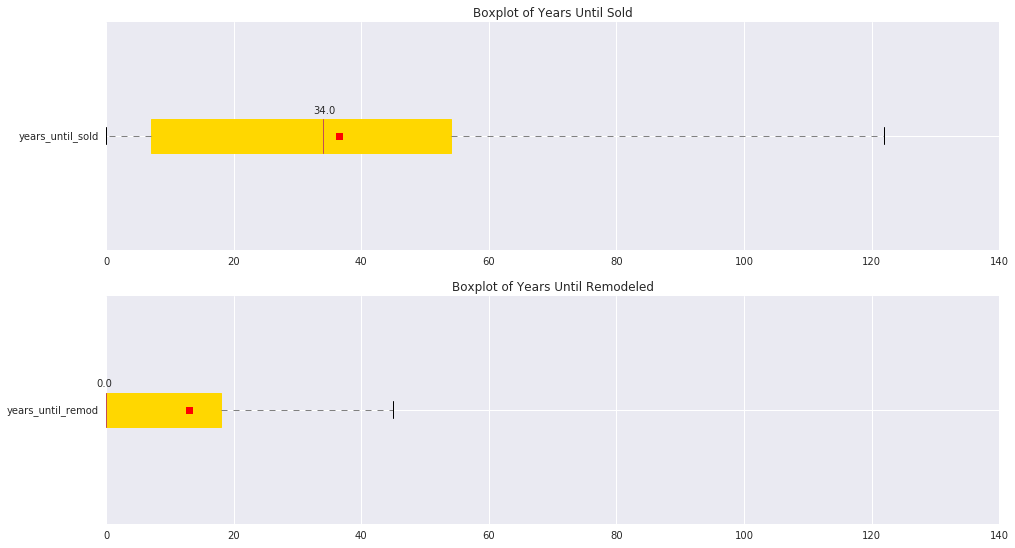

In [6]:
# create years_until_remod
ames_clean["years_until_remod"] = ames_clean["Year Remod/Add"] - ames_clean["Year Built"]

# create years_until_sold
ames_clean["years_until_sold"] = ames_clean["Yr Sold"] - ames_clean["Year Built"]

# remove those years that are negative
print("[ROWS TO REMOVE]")
print(ames_clean["years_until_remod"][ames_clean["years_until_remod"] < 0])
print("\n")
print(ames_clean["years_until_sold"][ames_clean["years_until_sold"] < 0])

# remove those rows
ames_clean = ames_clean.drop(
[ames_clean[ames_clean["years_until_remod"] < 0].index[0],
 ames_clean[ames_clean["years_until_sold"] < 0].index[0]], axis = 0)

# verify
print("\n")
print("[VERIFY MINIMUM OF BOTH]")
print("years_until_remod min.:", min(ames_clean["years_until_remod"])) 
print("years_until_sold min.:", min(ames_clean["years_until_sold"]))

# quick plot of both
median_yus = ames_clean["years_until_sold"].median()
median_yur = ames_clean["years_until_remod"].median()

fig = plt.figure(figsize = (16, 9))

ax1 = plt.subplot(2, 1, 1)
ax1.set_title("Boxplot of Years Until Sold")
ax1.text(median_yus-1.5, 1.1, median_yus)

ax2 = plt.subplot(2, 1, 2)
ax2.set_title("Boxplot of Years Until Remodeled")
ax2.text(median_yur-1.5, 1.1, median_yur)

boxprops = dict(boxes = "gold", whiskers = "gray")

# ames_clean.boxplot(["years_until_sold"], ax = ax1, vert = False, showmeans = True, grid = True)
# ames_clean.boxplot(["years_until_remod"], ax = ax2, vert = False, showmeans = True, grid = True)

ames_clean["years_until_sold"].plot.box(vert = False, showmeans = True, 
                                        grid = True, color = boxprops, 
                                        patch_artist = True, ax = ax1)

ames_clean["years_until_remod"].plot.box(vert = False, showmeans = True, 
                                        grid = True, color = boxprops, 
                                        patch_artist = True, ax = ax2)

<p style='text-align: justify;'>
Among the last feature engineering we will do is dropping columns that aren't useful for our regression, and columns that leak data about the final sale. After looking at the column documentation, those variables are:
</p>
- `PID` and `Order`
- `Mo Sold`, `Sale Condition`, `Sale Type`, and `Yr Sold`

In [7]:
# drop columns that aren't useful for LR
ames_clean = ames_clean.drop(["PID", "Order"], axis = 1)

# drop columns that leak data about the final sale
ames_clean = ames_clean.drop(["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"], axis = 1)
ames_clean = ames_clean.drop(["Year Built", "Year Remod/Add"], axis = 1)

Let's now update our `transform_features` function!

In [8]:
def transform_features(df):
    # drop columns that more than 5% missing vals
    nacounts     = df.isnull().sum()/len(df)*100
    dropnacounts = nacounts[nacounts > 5]
    df           = df.drop(dropnacounts.index, axis = 1)
    
    # drop text columns with at least 1 missing value    
    textcols         = df.select_dtypes("object").columns # text columns
    textnacounts     = df[textcols].isnull().sum()
    droptextnacounts = textnacounts[textnacounts >= 1]
    df = df.drop(droptextnacounts.index, axis = 1)
    
    # impute mode for numeric columns
    numcols     = df.select_dtypes(include = ["float", "integer"]).columns # numeric columns
    numnacounts = df[numcols].isnull().sum()
    numnacounts = numnacounts[numnacounts > 0]
    numcolsmode = np.transpose(df[numnacounts.index].mode()).rename(columns = {0:"Mode"}) # get the mode for each column
    fillnadict  = numcolsmode.to_dict()["Mode"] # create dictionary for fillna
    df          = df.fillna(fillnadict) # replace missing values

    # create years_until_remod and year_until_sold
    df["years_until_remod"] = df["Year Remod/Add"] - df["Year Built"]
    df["years_until_sold"]  = df["Yr Sold"] - df["Year Built"]

    # remove those rows with negative years
    df = df.drop([df[df["years_until_remod"] < 0].index[0],
                  df[df["years_until_sold"] < 0].index[0]], axis = 0)
    
    df = df.drop(["PID", "Order"], axis = 1)
    df = df.drop(["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"], axis = 1)
    df = df.drop(["Year Built", "Year Remod/Add"], axis = 1)
    
    return df

transdf = transform_features(ames)
transdf = select_features(transdf)

transdf_rmse = train_and_test(transdf)

print("RMSE After F.Engineering:", transdf_rmse) # Display RMSE

RMSE After F.Engineering: 56072.52569017749


### Feature Selection
<p style='text-align: justify;'>
While the RMSE is better than the initial one we had earlier, the improvement was only marginal. Let's now try to move onto another important step in building our model: Feature Selection!
</p>

<p style='text-align: justify;'>
There are many strategies as to how go about this, but one intuitive way is to choose those features that <mark>correlate strongly with our outcome variable</mark>. Specifically, we will be looking at the correlation coefficient between each feature and <code>SalePrice</code>, a statistic that describes the strength of their (positive/negative) linear relationship. To easily see those that have high correlations, let's visualize a heatmap.
</p>

In [9]:
# get pairwise correlations
corrs = ames_clean.corr()

# get absolute value and sort
sorted_corrs = corrs["SalePrice"].abs().sort_values(ascending = False)

print("[TOP 10 HIGHLY CORRELATED FEATURES]")
sorted_corrs[sorted_corrs.index != "SalePrice"].head(10)

[TOP 10 HIGHLY CORRELATED FEATURES]


Overall Qual        0.800279
Gr Liv Area         0.712893
Garage Cars         0.648071
Total Bsmt SF       0.641701
Garage Area         0.641184
1st Flr SF          0.632531
years_until_sold    0.559042
Full Bath           0.545641
Mas Vnr Area        0.505564
TotRms AbvGrd       0.497966
Name: SalePrice, dtype: float64

<p style='text_align: justify;'>
The list above is a great place to start, but for now, let's consider correlations of <code>0.4</code> and above to be "strongly correlated" and keep those features!
</p>

In [10]:
print("[HIGH CORR. NUMERIC FEATURES TO KEEP]")
print(sorted_corrs[(sorted_corrs.index != "SalePrice") 
                 & (sorted_corrs.values >= 0.4)])

keep_corr = sorted_corrs[sorted_corrs.values >= 0.4].index.tolist()
drop_corr = sorted_corrs[sorted_corrs.values < 0.4].index.tolist()

# drop weakly-correlated features
ames_clean = ames_clean.drop(drop_corr, axis = 1)
ames_clean.head(5)

[HIGH CORR. NUMERIC FEATURES TO KEEP]
Overall Qual        0.800279
Gr Liv Area         0.712893
Garage Cars         0.648071
Total Bsmt SF       0.641701
Garage Area         0.641184
1st Flr SF          0.632531
years_until_sold    0.559042
Full Bath           0.545641
Mas Vnr Area        0.505564
TotRms AbvGrd       0.497966
Fireplaces          0.475073
BsmtFin SF 1        0.437732
Name: SalePrice, dtype: float64


,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,...,Full Bath,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Cars,Garage Area,Paved Drive,SalePrice,years_until_sold
0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,1,TA,7,Typ,2,2.0,528.0,P,215000,50
1,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,1,TA,5,Typ,0,1.0,730.0,Y,105000,49
2,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,1,Gd,6,Typ,0,1.0,312.0,Y,172000,52
3,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,2,Ex,8,Typ,2,2.0,522.0,Y,244000,42
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,2,TA,6,Typ,1,2.0,482.0,Y,189900,13


<p style='text-align: justify;'>
As we can also see in the heatmap below where we skip getting the absolute values, we can see that:
</p>

- All of the features except for `years_until_sold` have a strong, <mark>positive</mark> linear relationship with `SalePrice`.
- Since `years_until_sold` is strongly negatively related on the other hand, this means that the bigger the time interval between when the house was built and when it was sold, the lower the price gets.
- The "strongest" feature is `Overall Qual`, which "rates the overall material and finish of the house," according to the data dictionary. This however poses a problem since it turns out to be a categorical variable! 

<p style='text-align: justify;'>
Statistically speaking, the concept of a correlation coefficient that measures the linear relationship between two features breaks down with categorical variables. You can read more about the Pearson Correlation Coefficient and its assumptions <a href="https://journals.lww.com/anesthesia-analgesia/Fulltext/2018/05000/Correlation_Coefficients__Appropriate_Use_and.50.aspx">here</a>. Fortunately, since <code>Overall Qual</code> is an <b>ordinal</b> variable, its correlation with the continous dependent variable can still be computed and interpreted using the Spearman Rank Correlation Coefficient instead. This does not mean, however, that the feature will not be helpful later on in our regression, only that we <mark>should be wary of how we interpret such statistics</mark> as below.
</p>

[[<matplotlib.text.Text at 0x7f77f04ae860>]]

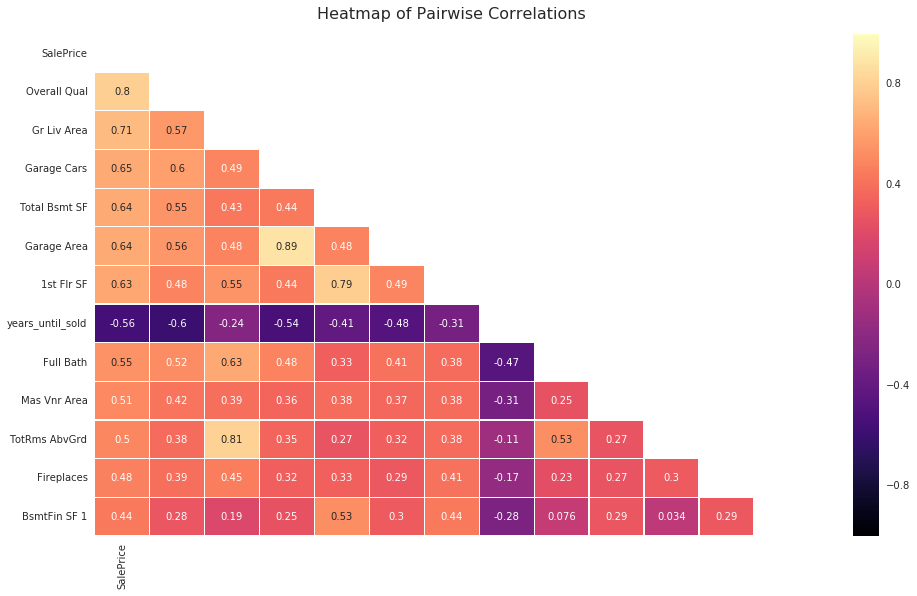

In [11]:
sns.set_style("white")

# setup up axes
fig, ax3 = plt.subplots(figsize = (16, 9))
ax3.set_title("Heatmap of Pairwise Correlations", size = 16, y = 1.02)

# Mask upper triangle of off-diagonals
mask = np.zeros_like(ames_clean[keep_corr].corr())
mask[np.triu_indices_from(mask)] = True

# generate heatmap
sns.heatmap(ames_clean[keep_corr].corr(), annot = True, linewidth = 0.2, ax = ax3,
            cmap = "magma", mask = mask).set(xticklabels=["SalePrice"])

<p style='text-align: justify;'>
Let's also look at the <b>nominal</b> features, or those that are discrete in nature and have no inherent ranking. Think of them as labels or categories.
</p>

- Which columns are currently numerical but need to be encoded as categorical instead (because the numbers don't have any semantic meaning)?
- If a categorical column has hundreds of unique values (or categories), should we keep it? When we dummy code this column, hundreds of columns will need to be added back to the data frame.

In [12]:
# get categorical features based on data dictionary
nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]

# list of nominal features still in our dataset
nominal_features = list(set(nominal_features).intersection(ames_clean.columns))
print("CHECK:", ", ".join(nominal_features))
print("\n")

# how many unique values in each categorical column?
unique_counts = ames_clean[nominal_features].apply(lambda col: len(col.value_counts())).sort_values()

# arbitrary cutoff of 10 unique values (worth experimenting)
drop_nonuniq_cols = unique_counts[unique_counts > 10].index
print("REMOVE:", ", ".join(drop_nonuniq_cols))

# drop nominal columns with many unique values
ames_clean = ames_clean.drop(drop_nonuniq_cols, axis = 1)
ames_clean.head(5)

CHECK: MS Zoning, Central Air, Heating, Condition 2, Condition 1, Foundation, Land Contour, Roof Matl, Exterior 2nd, House Style, Exterior 1st, Lot Config, Neighborhood, Roof Style, Street, Bldg Type


REMOVE: Exterior 1st, Exterior 2nd, Neighborhood


,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Condition 1,Condition 2,Bldg Type,...,Full Bath,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Cars,Garage Area,Paved Drive,SalePrice,years_until_sold
0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,...,1,TA,7,Typ,2,2.0,528.0,P,215000,50
1,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,Feedr,Norm,1Fam,...,1,TA,5,Typ,0,1.0,730.0,Y,105000,49
2,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,...,1,Gd,6,Typ,0,1.0,312.0,Y,172000,52
3,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,...,2,Ex,8,Typ,2,2.0,522.0,Y,244000,42
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,...,2,TA,6,Typ,1,2.0,482.0,Y,189900,13


<p style='text-align: justify;'>
After removing those columns, we can now convert those that we kept to categorical! We then create dummy variables for each of these columns.
</p>

In [13]:
nominal_final = ames_clean.select_dtypes("object")
# pd.get_dummies(ames_clean[nominal_final.columns]).columns.tolist()

# convert to categorical
for col in nominal_final:
    ames_clean[col] = ames_clean[col].astype("category")
    
# create dummy variables
ames_final = pd.concat([ames_clean,
                        pd.get_dummies(ames_clean.select_dtypes("category"))],
                        axis = 1)

# drop original text columns
ames_final = ames_final.drop(nominal_final, axis = 1)

ames_final.head(5)

,Overall Qual,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,TotRms AbvGrd,Fireplaces,Garage Cars,...,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Paved Drive_N,Paved Drive_P,Paved Drive_Y
0,6,112.0,639.0,1080.0,1656,1656,1,7,2,2.0,...,0,0,0,0,0,0,1,0,1,0
1,5,0.0,468.0,882.0,896,896,1,5,0,1.0,...,0,0,0,0,0,0,1,0,0,1
2,6,108.0,923.0,1329.0,1329,1329,1,6,0,1.0,...,0,0,0,0,0,0,1,0,0,1
3,7,0.0,1065.0,2110.0,2110,2110,2,8,2,2.0,...,0,0,0,0,0,0,1,0,0,1
4,5,0.0,791.0,928.0,928,1629,2,6,1,2.0,...,0,0,0,0,0,0,1,0,0,1


Let's now update our `select_features` function!

In [14]:
def select_features(df):
    # Selection by Correlation
    corrs = df.corr()
    sorted_corrs = corrs["SalePrice"].abs().sort_values(ascending = False)
    
    keep_corr = sorted_corrs[sorted_corrs.values >= 0.4].index.tolist()
    drop_corr = sorted_corrs[sorted_corrs.values < 0.4].index.tolist()
    df        = df.drop(drop_corr, axis = 1) # drop weakly-correlated features
    
    # Keep Nominal Features w/ # of Unique Values in Threshold
    nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", 
                        "Lot Config", "Neighborhood", "Condition 1", "Condition 2", "Bldg Type", 
                        "House Style", "Roof Style", "Roof Matl", "Exterior 1st", "Exterior 2nd", 
                        "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                        "Misc Feature", "Sale Type", "Sale Condition"]

    nominal_features = list(set(nominal_features).intersection(df.columns))
    unique_counts    = df[nominal_features].apply(lambda col: len(col.value_counts())).sort_values()

    drop_nonuniq_cols = unique_counts[unique_counts > 10].index # 10 as arbitrary cutoff    
    df                = df.drop(drop_nonuniq_cols, axis = 1) # drop nominal columns with many unique values
    
    # Get Dummy Variables
    nominal_final = df.select_dtypes("object")

    for col in nominal_final:
        df[col] = df[col].astype("category")

    df = pd.concat([df,
                    pd.get_dummies(df.select_dtypes("category"))], # create dummy variables
                    axis = 1) 
    df = df.drop(nominal_final, axis = 1) # drop original text columns
    
    return df

transdf  = transform_features(ames)
selectdf = select_features(transdf)

selectdf_rmse = train_and_test(selectdf)

print("RMSE After F.Selection:", selectdf_rmse) # Display RMSE

RMSE After F.Selection: 35184.690775114614


### Cross-Validation

<p style='text_align: justify;'>
Finally, when iterating on different features, <mark>using simple validation is a good idea</mark>. Let's add a parameter named <code>k</code> that controls the type of cross validation that occurs.
</p>

In [15]:
def train_and_test(df, k = 0):
    lm = LinearRegression()
    
    # Select numeric columns
    num_df   = df.select_dtypes(include = ["float", "integer"])
    features = num_df.columns.drop("SalePrice") # drop dependent variable
    
    if k == 0:
        train = df[:1460]
        test  = df[1460:]
        
        # train a model using the train set
        lm.fit(train[features], train["SalePrice"])

        # make predictions by testing on the test set
        pred = lm.predict(test[features])

        # get RMSE
        rmse = np.sqrt(mean_squared_error(test["SalePrice"], pred))
        return print(">>> LOOCV RMSE:", rmse)
    
    if k == 1:
        # Shuffle rows
        from sklearn.utils import shuffle
        df = df.sample(frac = 1).reset_index(drop = True)
        # df = shuffle(df)
        # df = df.reset_index(inplace = True, drop = True)
        fold_one = df[:1460]
        fold_two = df[1460:]
        
        # Train with F1, Test with F2
        lm.fit(fold_one[features], fold_one["SalePrice"])
        pred_fit1 = lm.predict(fold_two[features])
        rmse_fit1 = np.sqrt(mean_squared_error(fold_two["SalePrice"], pred_fit1))
        
        # Train with F2, Test with F1
        lm.fit(fold_two[features], fold_two["SalePrice"])
        pred_fit2 = lm.predict(fold_one[features])
        rmse_fit2 = np.sqrt(mean_squared_error(fold_one["SalePrice"], pred_fit2))
        
        # Average the RMSEs
        return print(">>>", k, "- Fold RMSE:", np.mean([rmse_fit1, rmse_fit2]))
    
    else:
        # Do K-Fold CV
        from sklearn.model_selection import KFold
        
        kf = KFold(n_splits = k, shuffle = True)
        rmse_values = []
        for train_index, test_index, in kf.split(df):
            train = df.iloc[train_index]
            test  = df.iloc[test_index]
            
            lm.fit(train[features], train["SalePrice"])
            pred = lm.predict(test[features])
            rmse = np.sqrt(mean_squared_error(test["SalePrice"], pred))
            rmse_values.append(rmse)
            print(train_index, ":", rmse)
        
        return print(">>>", k, "- Fold RMSE:", np.mean(rmse_values))

transdf  = transform_features(ames)
selectdf = select_features(transdf)

train_and_test(selectdf, k = 10)


[   0    1    3 ... 2925 2926 2927] : 23919.821770850278
[   1    2    3 ... 2925 2926 2927] : 26254.503673805953
[   0    1    2 ... 2925 2926 2927] : 29482.517378367167
[   0    1    2 ... 2924 2925 2927] : 28470.566057756434
[   0    1    2 ... 2925 2926 2927] : 28119.522851898695
[   0    1    2 ... 2924 2926 2927] : 27805.61962795033
[   0    1    2 ... 2925 2926 2927] : 26712.88912879455
[   0    2    3 ... 2925 2926 2927] : 36963.72667590405
[   0    1    2 ... 2925 2926 2927] : 23275.298640991063
[   0    1    2 ... 2924 2925 2926] : 49840.168818844024
>>> 10 - Fold RMSE: 30084.463462516258
